In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
from skimage.transform import resize, rotate
import pandas as pd 
from skimage import io, color, filters, feature, restoration
from skimage.transform import resize, rotate
from skimage import data
from skimage.feature._canny import canny
import os


In [4]:
import glob
non_demented = glob.glob('../Alz_data/train/NonDemented/*.jpg')
mod_demented = glob.glob('../Alz_data/train/ModerateDemented/*.jpg')
mild_demented = glob.glob('../Alz_data/train/MildDemented/*.jpg')
very_mild_demented = glob.glob('../Alz_data/train/VeryMildDemented/*.jpg')

In [30]:
# good to import data, but use resize gray to resize images

def array(filepath):
    x = np.array([np.array(Image.open(fname)) for fname in filepath])
    return x

In [31]:
nom_demented = array(non_demented)

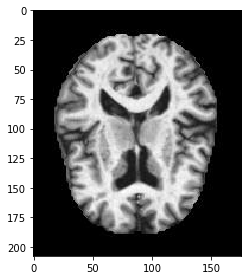

In [34]:
nd = io.imshow(non_demented[0])

In [35]:
mod_demented = array(mod_demented)

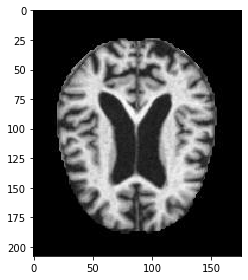

In [36]:
mod = io.imshow(mod_demented[0])

In [37]:
mild_demented = array(mild_demented)

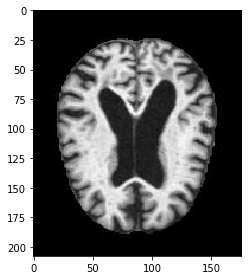

In [44]:
mild = io.imshow(mild_demented[4])

In [39]:
very_mild_demented = array(very_mild_demented)

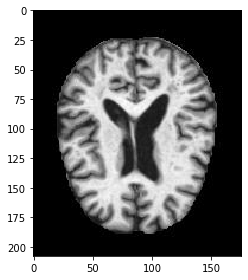

In [41]:
vm = very_mild_demented[4])

In [45]:
raw = [nd, vm, mild, mod]

In [7]:
def resize_gray_mat(filelist):
    x = []
    for fname in filelist:
        vec = np.array(Image.open(fname))
        rs = resize(vec, (64,64))
        img = color.rgb2gray(rs)
        x.append(img)
    return np.array(x)

In [8]:
non_dem = resize_gray_mat(non_demented)

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


In [9]:
non_dem_shape = non_dem.shape[0]

In [10]:
mod_dem = resize_gray_mat(mod_demented)

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


In [11]:
mild_dem = resize_gray_mat(mild_demented)

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


In [12]:
very_mild_dem = resize_gray_mat(very_mild_demented)

/Users/Kelly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


In [13]:
non_dem_shape = non_dem.shape[0]
mod_dem_shape = mod_dem.shape[0]
very_mild_dem_shape = mild_dem.shape[0]
mild_dem_shape = very_mild_dem.shape[0]

In [14]:
print(non_dem_shape)
print(mod_dem_shape)
print(very_mild_dem_shape)
print(mild_dem_shape)

2560
52
717
1792


In [15]:
data = [non_dem_shape, mod_dem_shape, very_mild_dem_shape, mild_dem_shape]

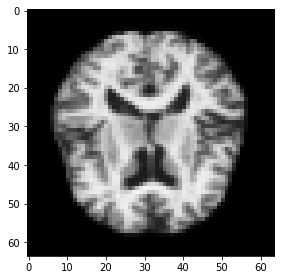

In [29]:
io.imshow(non_dem[0])

In [5]:
def counts():
    labels = ['None', 'Very Mild','Mild', 'Moderate',]
    data = np.array([2560, 717, 1792, 52])
    width = 0.35
    fig, ax = plt.subplots(dpi=150)
    ind = np.arange(4)
    ax.bar(ind, data, width, color='mediumturquoise')
    ax.set_xticks(ind)
    ax.set_xticklabels(labels)
    ax.set_title('Dataset Features')
    plt.tight_layout()
    plt.savefig('../images/graph_data.jpg')
    plt.show()

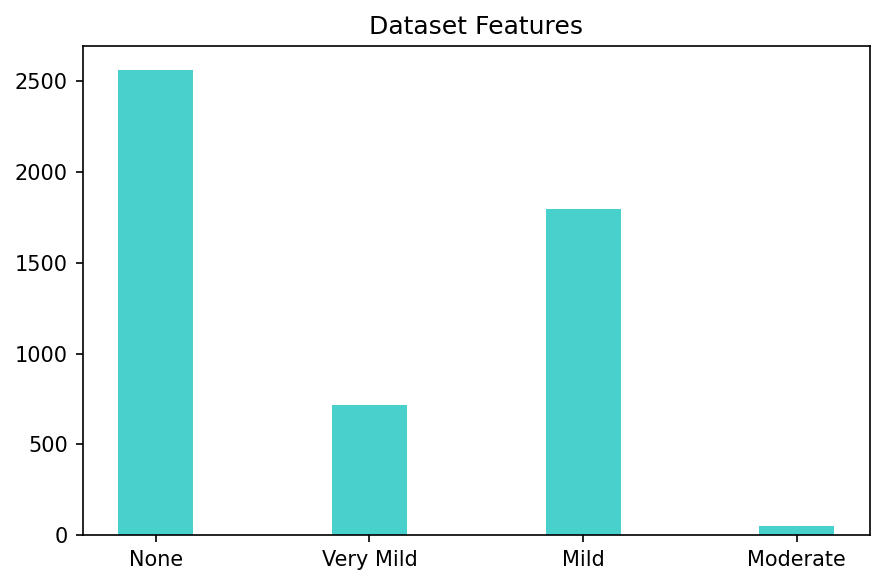

In [6]:
counts()

In [16]:
def find_mean_img(full_mat, title):
    mean_img = full_mat.mean(axis = 0)
    plt.imshow(mean_img, cmap='Greys_r')
    plt.axis('off')
    plt.show()
    return mean_img

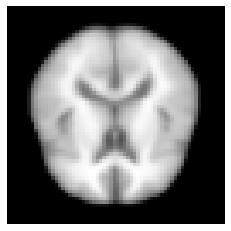

In [17]:
non_dem_avg = find_mean_img(non_dem, "Non-Demented Avg");

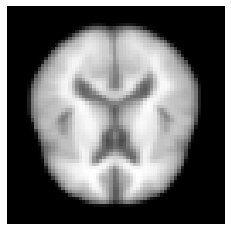

In [18]:
very_mild_avg = find_mean_img(very_mild_dem, "Very Mild Demented Avg")

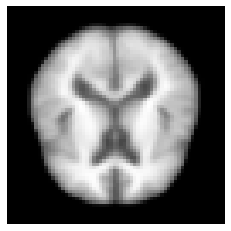

In [19]:
mild_avg = find_mean_img(mild_dem, "Mild Demented Avg")

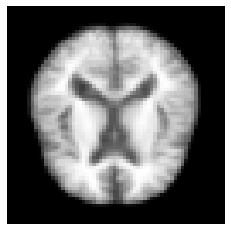

In [20]:
mod_avg = find_mean_img(mod_dem, "Moderate Demented Avg ")

In [21]:
imgs = [non_dem_avg, very_mild_avg, mild_avg, mod_avg]

In [26]:
# def graph_averages(imgs):    
#     """ graph set to take 4 images and graph what you're depicting. Could be used for average data 
#     or showing different filters.
#     """
#     names = ['No Dementia Average', 'Very Mild Average', 
#           'Mild Average', 'Moderate Average']
#     fig, axs = plt.subplots(2,2, figsize=(10,10), dpi=150)
#     for idx, ax in enumerate(axs.flatten()):
#         ax.imshow(imgs[idx], cmap="gray")
#         ax.set_title(names[idx], fontsize=16)         
#         ax.tick_params(left=False,
#                     bottom=False,
#                     labelleft=False,
#                     labelbottom=False)
#     plt.tight_layout()
#     plt.savefig('../images/4imgs_rawdata.jpg')
#     plt.show()

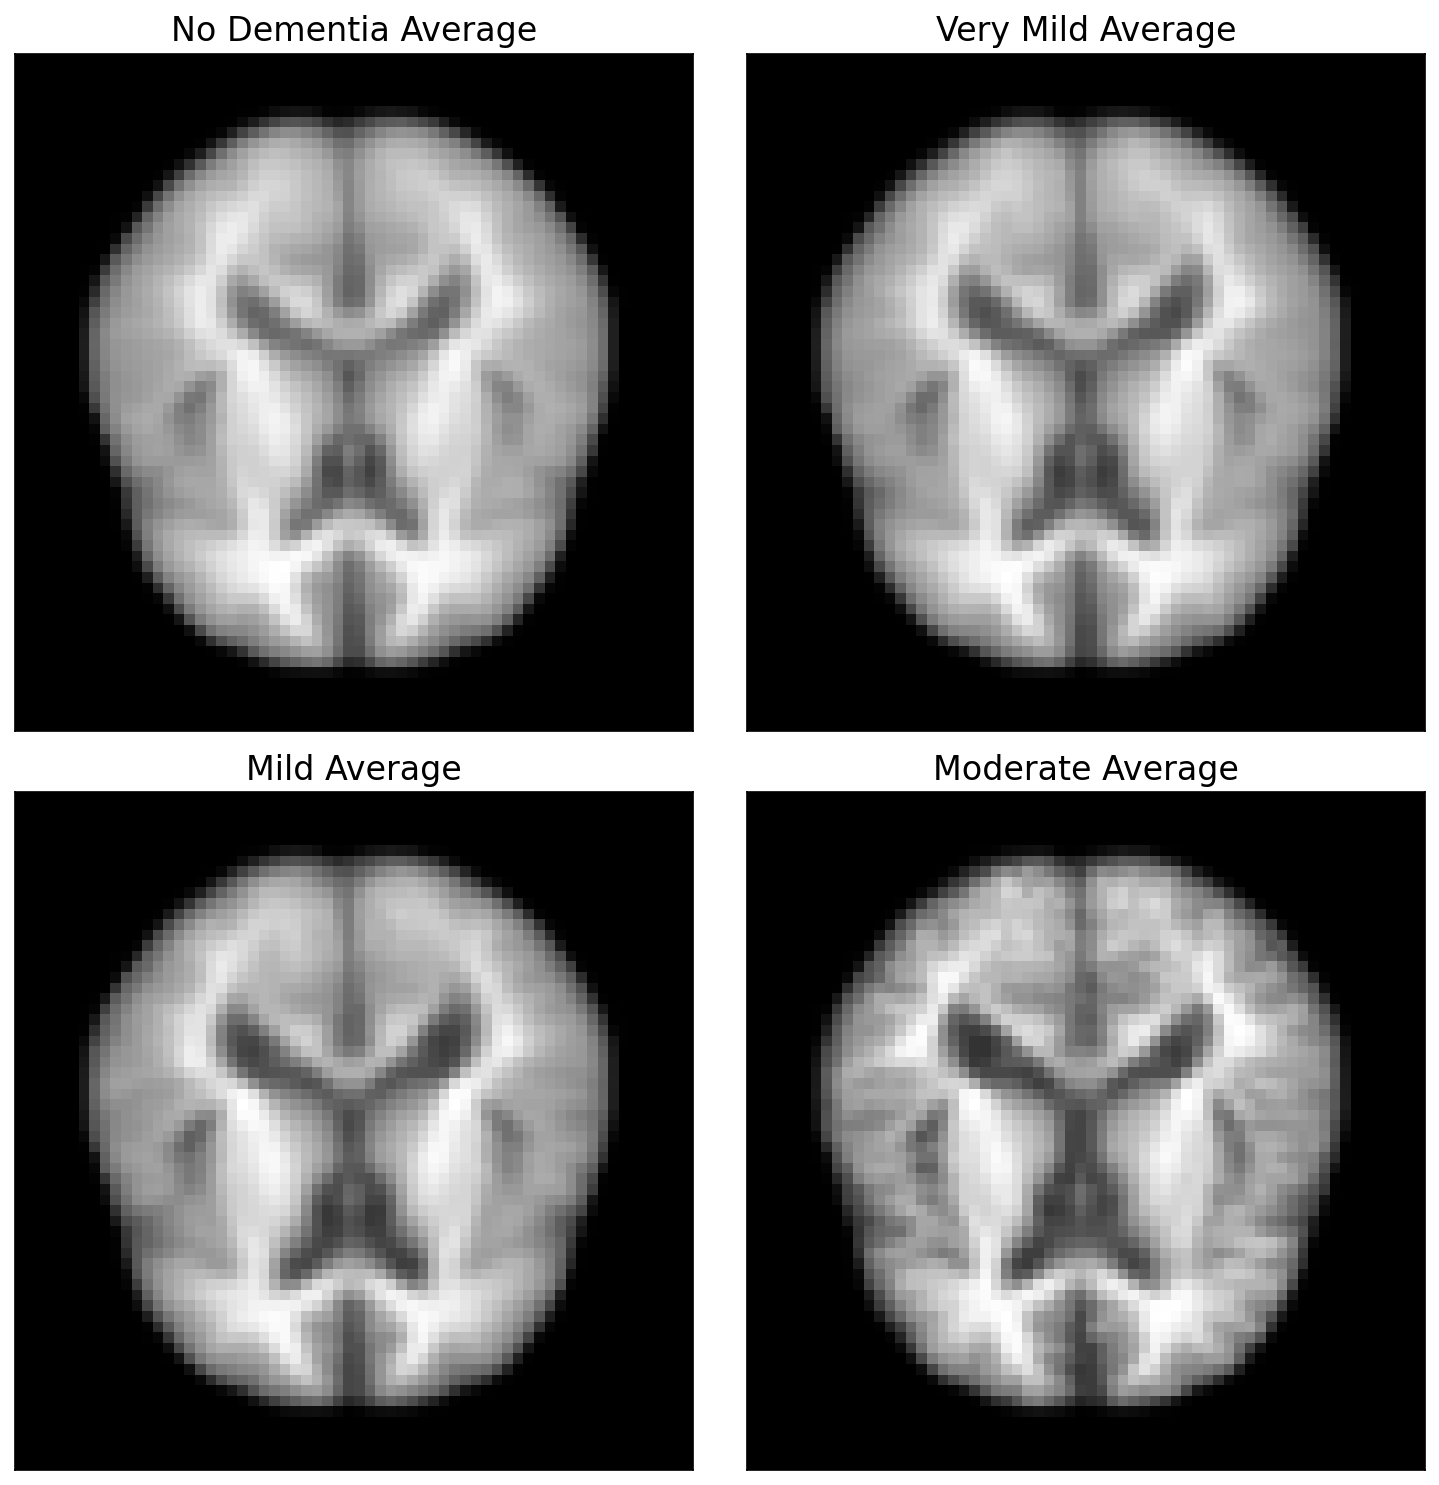

In [25]:
graph_averages(imgs)

TypeError: Image data of dtype object cannot be converted to float

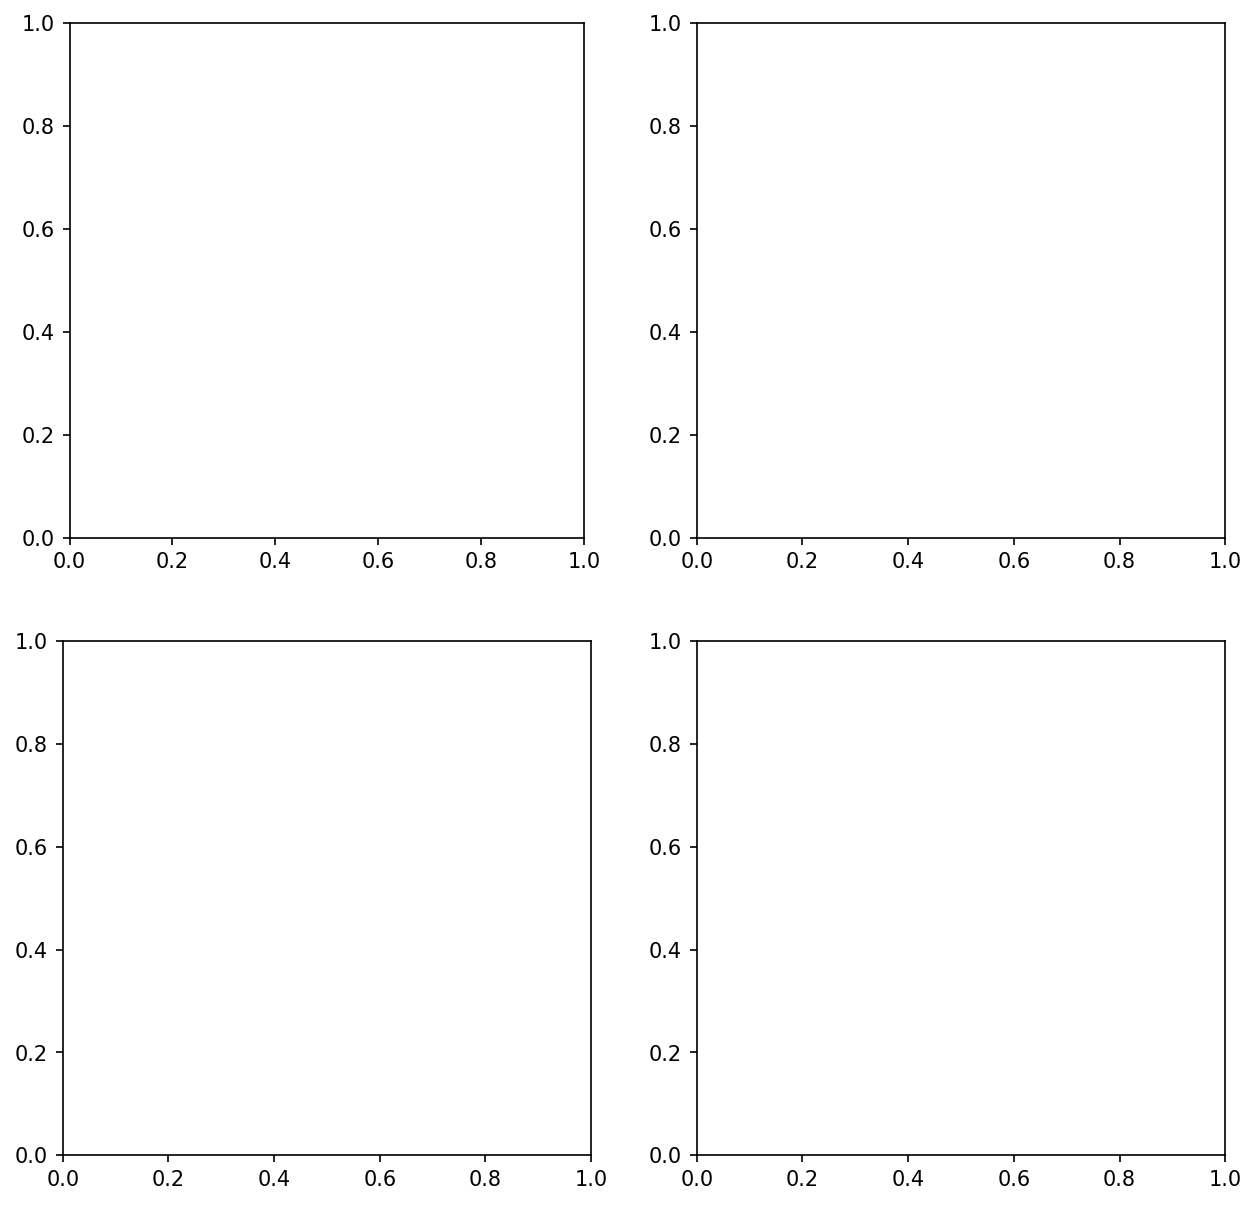

In [50]:
graph_averages(raw)

In [53]:
def graph_averages(imgs):    
    fig, axs = plt.subplots(2,2, figsize=(10,10), dpi=150)
    for idx, ax in enumerate(axs.flatten()):
        ax.imshow(imgs[idx], cmap="gray")
    axs[0,0].set_title('Non-Demented Average', fontsize=16)
    axs[0,1].set_title('Very Mild Demented Average', fontsize=16)
    axs[1,0].set_title('Mild Demented Average', fontsize=16)
    axs[1,1].set_title('Moderate Demented Average', fontsize=16)
    axs[0,0].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    axs[0,1].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    axs[1,0].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    axs[1,1].tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.tight_layout()
    plt.savefig('../images/4imgs_canny_data.jpg')
    plt.show()

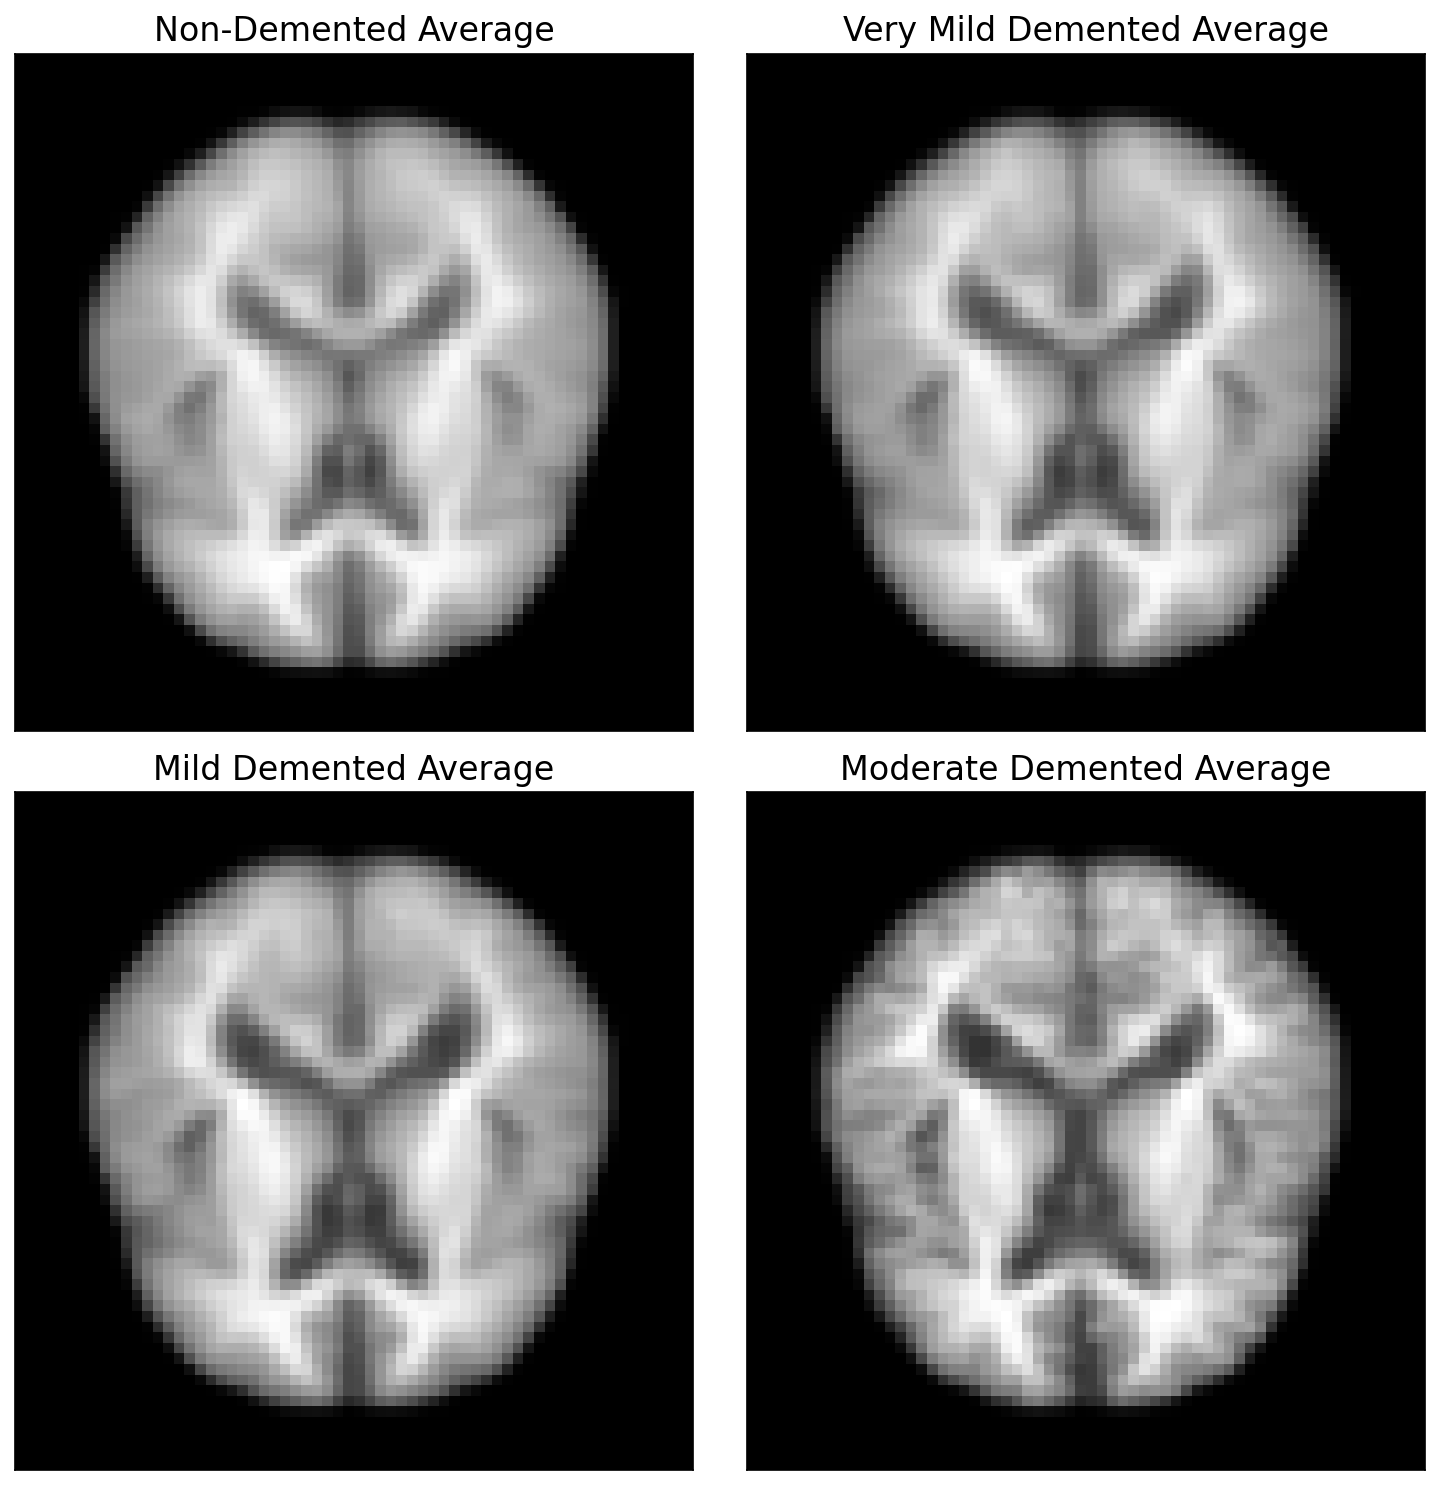

In [52]:
graph_averages(imgs)

In [55]:
def make_gray(img):
    img = color.rgb2gray(img)
    return img   

def apply_sobel(img, mode='nearest'):
    return filters.sobel(img)

def apply_canny(img):
    return feature.canny(img, sigma=2, low_threshold=.1, high_threshold=.4)

def restoration_bi(img):
    return restoration.denoise_bilateral(img, sigma_spatial=.02, bins=1000, mode='edge')

def restoration_cham(img):
    return restoration.denoise_tv_chambolle(img, weight=.0001)

In [56]:
canny = [apply_canny(non_dem_avg), apply_canny(very_mild_avg), apply_canny(mild_avg), apply_canny(mod_avg)]

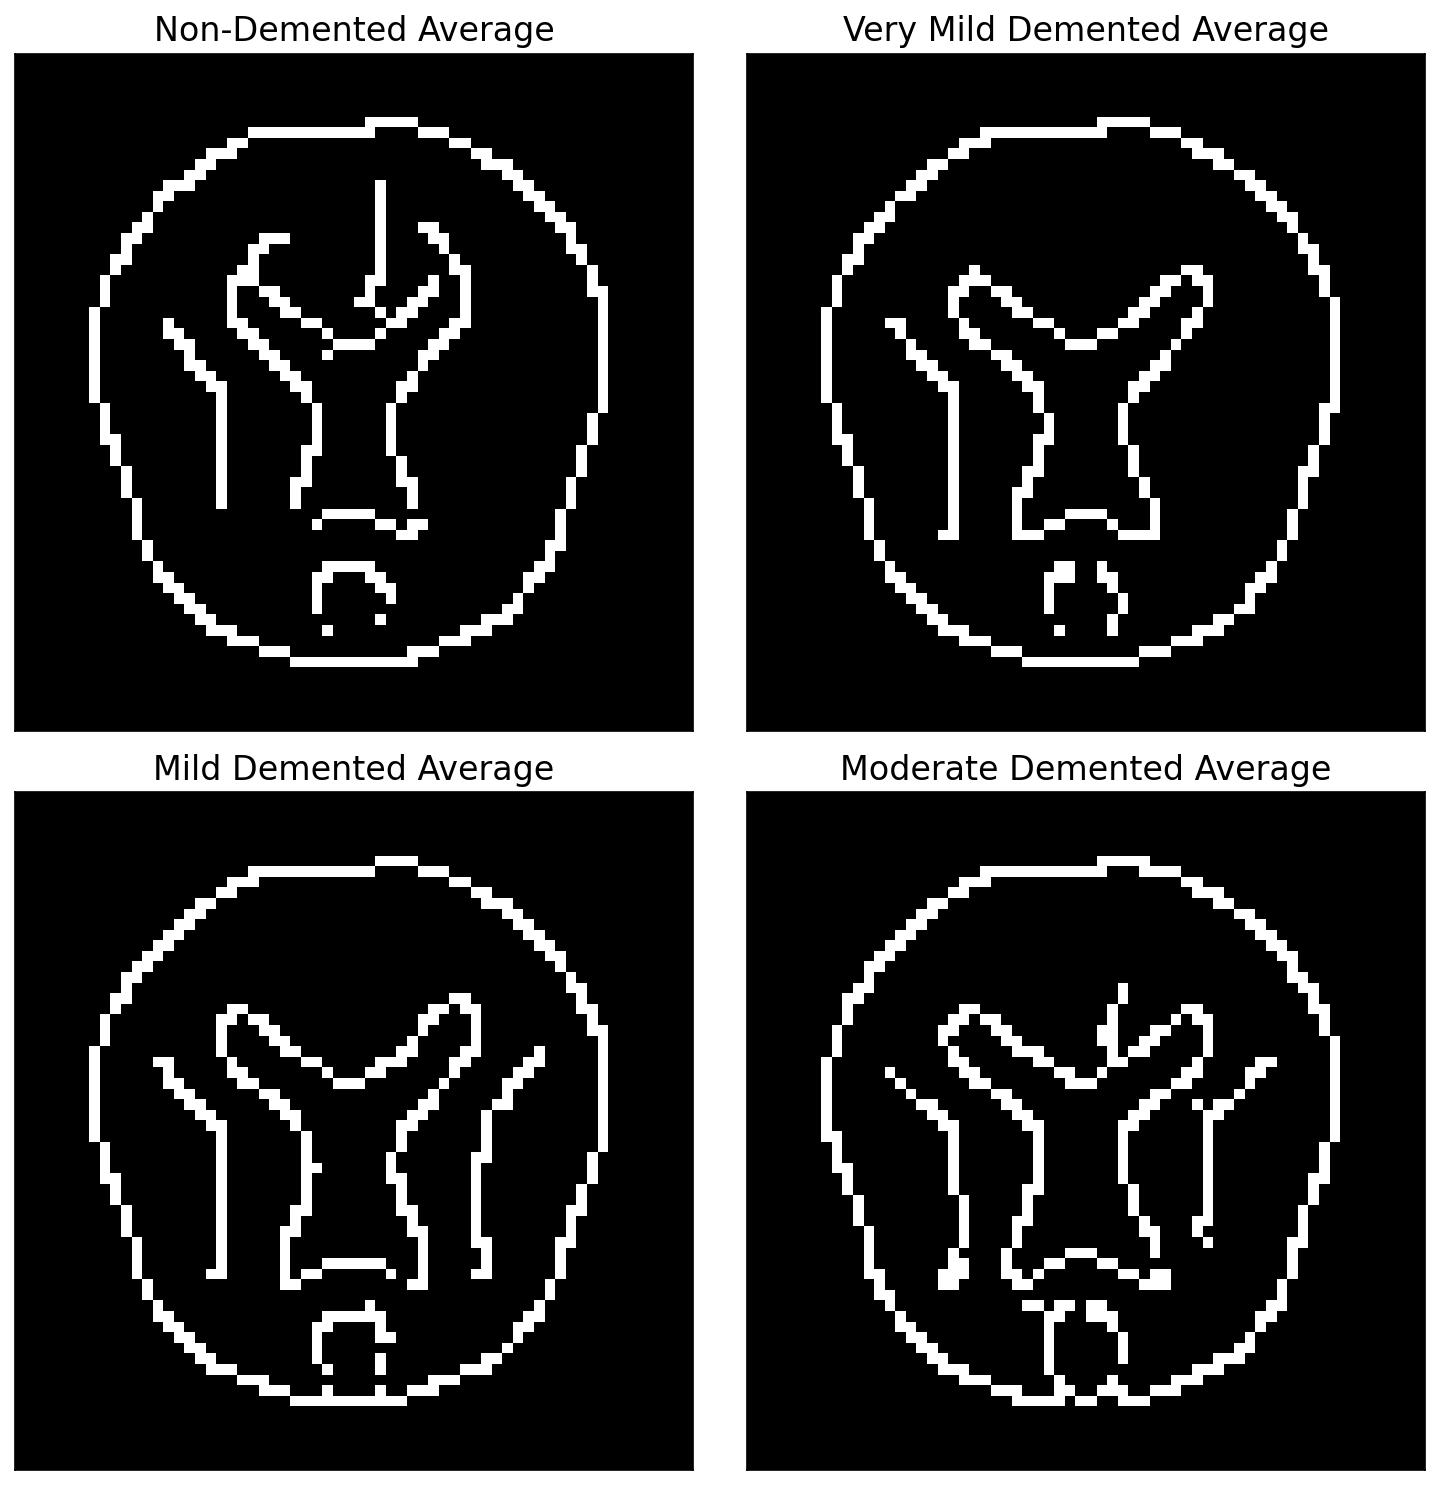

In [57]:
graph_averages(canny)

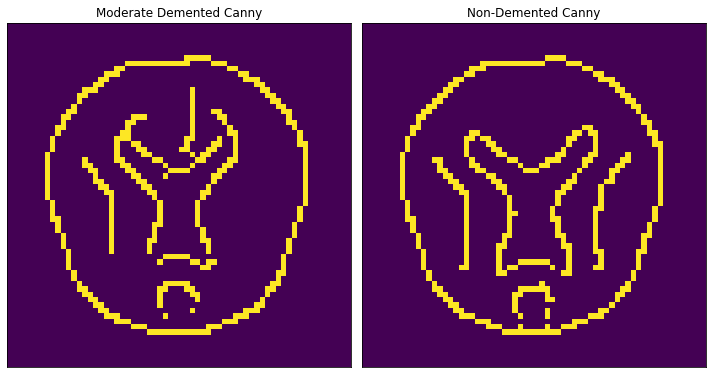